In [2]:
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import DataLoader
from torchvision import datasets, models
from PIL import Image
import torch.nn.functional as F

#### Load Data

In [3]:
train_dir = 'dataset/training_set'
test_dir = 'dataset/test_set'

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (
0.5, 0.5, 0.5))
])
# Dataset and DataLoader
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)



In [4]:
# Check số lớp
num_classes = len(train_dataset.classes)
print(f'Số lớp: {num_classes}')

Số lớp: 2


In [5]:
class CNNModel(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNNModel, self).__init__()
        self.Layer1  = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 1, padding = 1), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.Layer2  = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.Layer3  = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.fc = nn.Linear(128, num_classes) # Dense layer
    def forward(self, x):
        x = self.Layer1(x)
        x = self.Layer2(x)
        x = self.Layer3(x)
        # x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.mean(x, dim=[2, 3])  # Global Average Pooling
        x = self.fc(x)
        return x

In [6]:
model = CNNModel(num_classes=num_classes)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')

Total number of parameters: 93506


#### Train

In [ ]:
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        Loss = loss_function(outputs, labels)
        Loss.backward()
        optimizer.step()
        running_loss += Loss.item()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/100], Loss: 0.1008
Epoch [2/100], Loss: 0.0950
Epoch [3/100], Loss: 0.0867
Epoch [4/100], Loss: 0.0863
Epoch [5/100], Loss: 0.0794
Epoch [6/100], Loss: 0.0873
Epoch [7/100], Loss: 0.0642
Epoch [8/100], Loss: 0.0626
Epoch [9/100], Loss: 0.0803
Epoch [10/100], Loss: 0.0701
Epoch [11/100], Loss: 0.0576
Epoch [12/100], Loss: 0.0447
Epoch [13/100], Loss: 0.0393
Epoch [14/100], Loss: 0.0353
Epoch [15/100], Loss: 0.0408
Epoch [16/100], Loss: 0.0350
Epoch [17/100], Loss: 0.0900
Epoch [18/100], Loss: 0.0252
Epoch [19/100], Loss: 0.0213
Epoch [20/100], Loss: 0.0246
Epoch [21/100], Loss: 0.0195
Epoch [22/100], Loss: 0.0388
Epoch [23/100], Loss: 0.0367
Epoch [24/100], Loss: 0.0340
Epoch [25/100], Loss: 0.0264
Epoch [26/100], Loss: 0.0123
Epoch [27/100], Loss: 0.0107
Epoch [28/100], Loss: 0.0197
Epoch [29/100], Loss: 0.0406
Epoch [30/100], Loss: 0.0165
Epoch [31/100], Loss: 0.0065


#### Evaluation

Accuracy of the model on the test images: 83.24270884824519 %
Accuracy of the model on the test images: 83.24270884824519 %


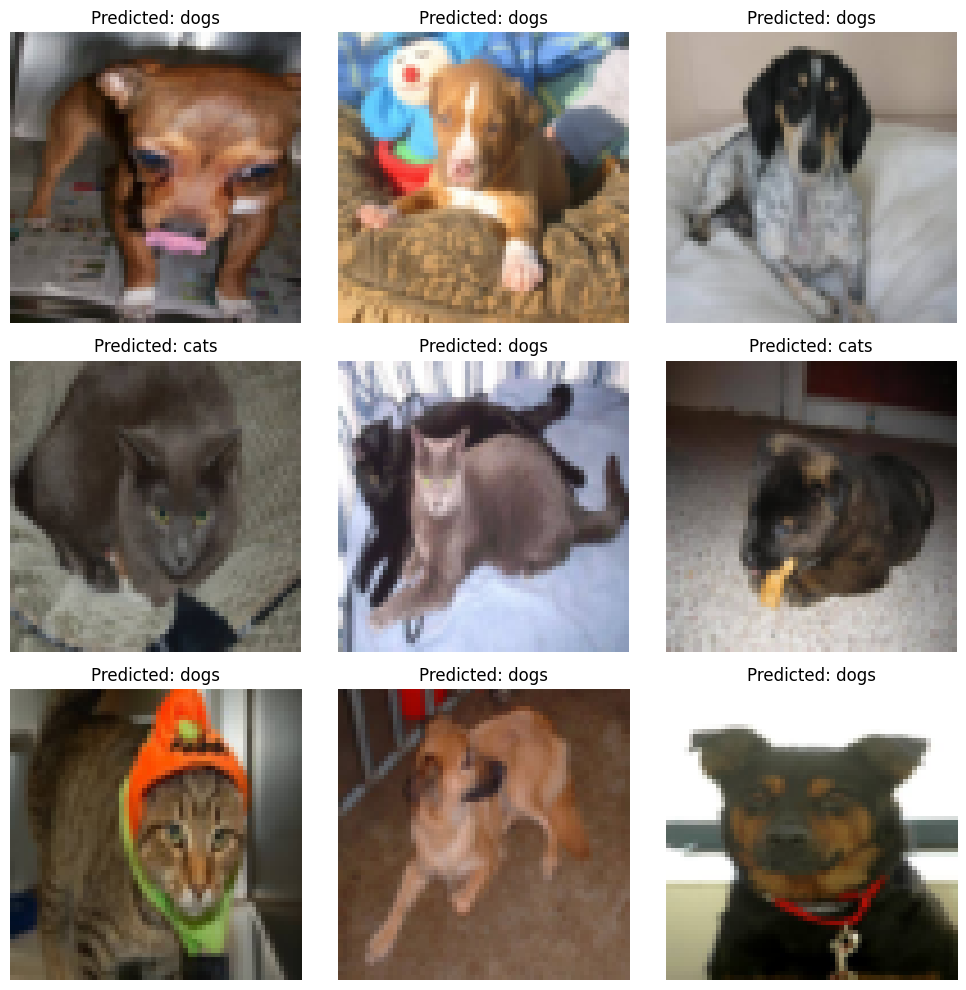

In [9]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on the test images: {100 * correct / total} %')
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy} %')

# Predict some sample images
num_images = 9
indices = torch.randperm(len(test_dataset))[:num_images]
sample_images = [test_dataset[i][0] for i in indices]
sample_images = torch.stack(sample_images)
with torch.no_grad():
    outputs = model(sample_images)
    _, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i].permute(1, 2, 0) * 0.5 + 0.5)
    plt.title(f'Predicted: {train_dataset.classes[predicted[i]]}')
    plt.axis('off')
0
plt.tight_layout()
plt.show()

